In [31]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from faker import Faker
import matplotlib.pyplot as plt

In [32]:
# Load your dataset
df = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Raw\\aug_test.csv')
#test_data = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\Thesis\\Data\\Preprocessed\\aug_test_processed.csv')
answers = np.load('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Raw\\answer.npy')

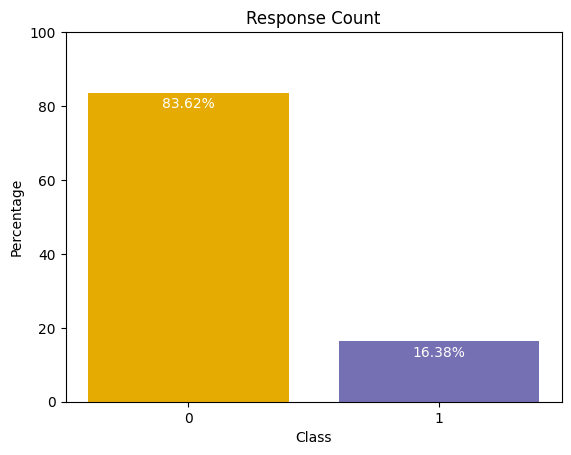

In [33]:
# Count the number of occurrences of each class
class_counts = np.bincount(answers)

# Calculate the percentage of each class
total_responses = len(answers)
class_percentages = class_counts / total_responses * 100

# Set the color palette
palette = sns.color_palette('Dark2_r', 2)

# Plotting the distribution of the response variable
bars = plt.bar(['0', '1'], class_percentages, color=palette)

# Adding percentage text on top of each bar
for bar, percentage in zip(bars, class_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{percentage:.2f}%', ha='center', va='bottom', color='white')

plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Response Count')
plt.ylim(0, 100)  # Ensures the y-axis goes from 0 to 100%
plt.show()

In [19]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201


In [34]:
# Initialize Faker
fake = Faker()

# Anonymizing 'id' by replacing it with a pseudonymized version, if exists
if 'id' in df.columns:
    id_map = {original_id: fake.uuid4() for original_id in df['id']}
    df['id'] = df['id'].map(id_map)
    
# Generalizing 'Age' into Age Groups, if 'Age' exists
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 18 and x<=30 else 'MiddleAge' if x>30 and x<=60 else 'OldAge')
# Remove the 'Age' column from the DataFrame
df.drop('Age', axis=1, inplace=True)
# Save the anonymized DataFrame to a new CSV file
anonymized_file_path = 'C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Anonymized\\aug_test_anonymized.csv'
df.to_csv(anonymized_file_path, index=False)

print(f"Anonymized dataset saved to {anonymized_file_path}")


Anonymized dataset saved to C:\Users\USER-PC\Desktop\ThesisCode\Data\Anonymized\aug_test_anonymized.csv


In [21]:
# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
import numpy as np
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(df)
#scale_features(da)

In [22]:
#This code will create a new column in the DataFrame called Region_Category,
#which categorizes each Region_Code as 'High', 'Medium', or 'Low' based on how frequently each code appears relative to others.

def categorize_region(df):
    # Get the counts of each unique value in 'Region_Code'
    region_counts = df['Region_Code'].value_counts()
    
    # Define thresholds for high, medium, and low frequency
    high_threshold = region_counts.quantile(0.75)  # Top 25% of regions by frequency
    medium_threshold = region_counts.quantile(0.25)  # Bottom 25% of regions by frequency
    
    # Function to apply to each region to determine its category
    def get_region_category(region):
        if region_counts[region] > high_threshold:
            return 'High'
        elif region_counts[region] < medium_threshold:
            return 'Low'
        else:
            return 'Medium'
    
    # Apply the function to 'Region_Code' to create a new 'Region_Category' column
    df['Region_Category'] = df['Region_Code'].apply(get_region_category)
    
    return df

# Assuming 'df' is your DataFrame
df = categorize_region(df)

# Now, if you want to see the first few rows to check the new category
print(df.head())

                                     id  Gender  Driving_License  Region_Code  \
0  adbf7b78-f465-4ec9-a665-eff1db7919f1  Female                1         39.0   
1  a2e8a34d-7cb7-4142-82ea-96bb60f9664a  Female                1         28.0   
2  10f641a2-5db5-4033-a836-8b8b3dfc2320    Male                1         28.0   
3  f9d4009a-0824-47c3-bece-44a9b268c5bd    Male                1         50.0   
4  cd5ac919-ea91-43f7-a0fd-d8c649ec6b5d  Female                1         10.0   

   Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                   1    1-2 Year             No         38244.0   
1                   0   > 2 Years            Yes         37577.0   
2                   1    1-2 Year             No         24578.0   
3                   1    1-2 Year             No         40507.0   
4                   0    < 1 Year            Yes         36783.0   

   Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                 124.0      146 

In [23]:
# Drop the 'Annual_Premium' column from the DataFrame
da=df
da.drop('Annual_Premium', axis=1, inplace=True)

# Find indices of rows to drop (those without a driving license or under 18)
indices_to_drop = da[(da['Driving_License'] == 7)].index

# Drop these rows using the indices
df_dropped = da.drop(indices_to_drop)
#print(da.count())
#print("After deleting clients who they don't have Driving_license")
# Display the DataFrame to verify rows are dropped
#print(df_dropped.count())


In [24]:
df_dropped.to_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Anonymized\\aug_test_anonymized.csv', index=False)
print("Data cleaning is done")


Data cleaning is done


In [25]:
df=df_dropped
print(df.columns)


Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage',
       'Age_Group', 'Annual_Premium_Treated', 'Region_Category'],
      dtype='object')


In [26]:
df = df.drop(['Driving_License','Region_Code'], axis=1)
x = df.drop(['id'], axis=1)

# **Feature Selection**
---

## **Categorical Feature Selection**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for the new dataset
le_vehicle_age_new = LabelEncoder()
le_vehicle_damage_new = LabelEncoder()
le_age_new = LabelEncoder()
le_gender_new = LabelEncoder()
le_region_new = LabelEncoder()
#le_vintage_new = LabelEncoder()
#le_region_frequency= LabelEncoder()

# Encode categorical columns in the new dataset
df['Vehicle_Age'] = le_vehicle_age_new.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = le_vehicle_damage_new.fit_transform(df['Vehicle_Damage'])
df['Age_Group'] = le_age_new.fit_transform(df['Age_Group'])
df['Gender'] = le_age_new.fit_transform(df['Gender'])
df['Region_Category'] = le_region_new.fit_transform(df['Region_Category'])

df.head()

,id,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category
0,adbf7b78-f465-4ec9-a665-eff1db7919f1,0,1,0,0,124.0,146,0,38244.0,2
1,a2e8a34d-7cb7-4142-82ea-96bb60f9664a,0,0,2,1,122.0,109,0,37577.0,0
2,10f641a2-5db5-4033-a836-8b8b3dfc2320,1,1,0,0,26.0,63,0,24578.0,0
3,f9d4009a-0824-47c3-bece-44a9b268c5bd,1,1,0,0,8.0,129,2,40507.0,0
4,cd5ac919-ea91-43f7-a0fd-d8c649ec6b5d,0,0,1,1,152.0,201,2,36783.0,2


In [28]:
#from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Select the numerical features for scaling
#numerical_features = ['Policy_Sales_Channel', 'Vintage', 'Annual_Premium_Treated']

# Scaling the selected features
#df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [29]:
# Load the anonymized dataset and see the first rows
anonymized_file_path = 'C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\aug_test_processed.csv'
df.to_csv(anonymized_file_path, index=False)


In [30]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0